Loading ResNet50 model from ..\models\weights\transfer_learning_resnet50.h5


Found 3000 images belonging to 6 classes.


c:\Users\hp\assignment\myvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



🔍 Evaluating Transfer Learning (ResNet50)...

94/94 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step
Classification Report - Transfer Learning (ResNet50):

              precision    recall  f1-score   support

   buildings       0.96      0.90      0.93       437
      forest       0.98      1.00      0.99       474
     glacier       0.90      0.84      0.87       553
    mountain       0.86      0.89      0.88       525
         sea       0.95      0.98      0.96       510
      street       0.92      0.96      0.94       501

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



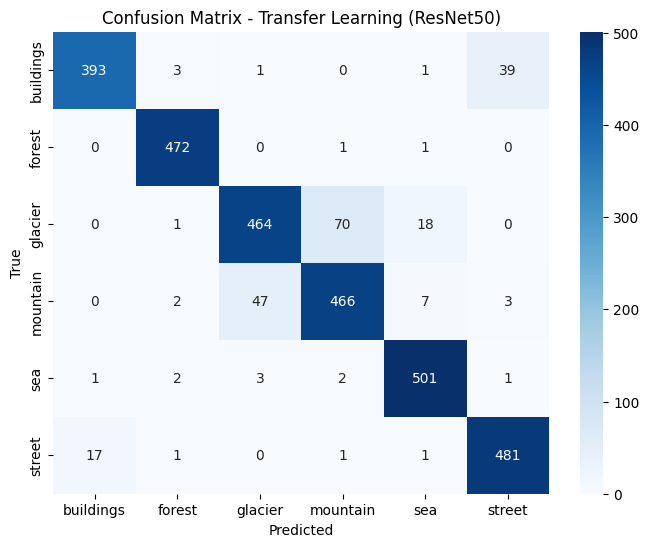

Loading Custom CNN model from ..\models\weights\custom_cnn.keras
Found 3000 images belonging to 6 classes.

🔍 Evaluating Custom CNN...



c:\Users\hp\assignment\myvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step
Classification Report - Custom CNN:

              precision    recall  f1-score   support

   buildings       0.72      0.85      0.78       437
      forest       0.85      0.99      0.91       474
     glacier       0.85      0.71      0.77       553
    mountain       0.82      0.72      0.76       525
         sea       0.79      0.84      0.81       510
      street       0.86      0.80      0.83       501

    accuracy                           0.81      3000
   macro avg       0.81      0.82      0.81      3000
weighted avg       0.82      0.81      0.81      3000



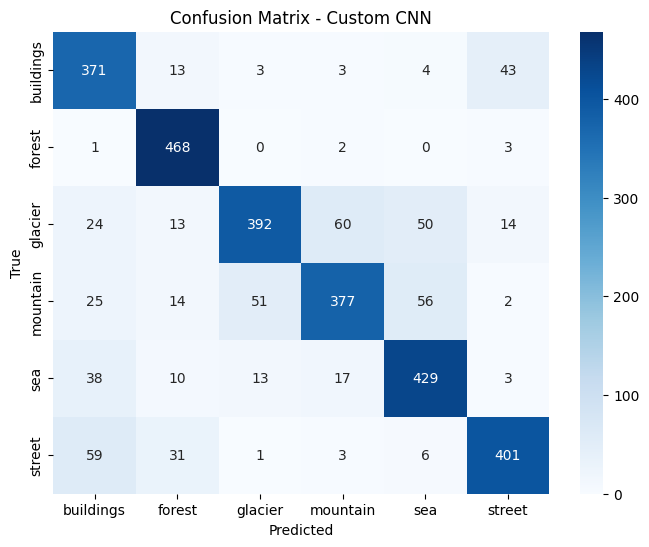

In [ ]:
# --- Imports ---
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from pathlib import Path

# --- Paths ---
test_dir = Path("../data/seg_test/seg_test")
resnet_model_path = Path("../models/weights/transfer_learning_resnet50.h5")
cnn_model_path = Path("../models/weights/custom_cnn.keras")

# --- Constants ---
IMG_SIZE_RESNET = (224, 224)   # ResNet50 requires 224x224
IMG_SIZE_CNN = (150, 150)      # Your CNN was trained on 150x150
BATCH_SIZE = 32


# ============== 1. Function to Evaluate Models ==============
def evaluate_model(model, test_generator, model_name):
    """Evaluates a trained model and prints classification report + confusion matrix."""
    print(f"\n🔍 Evaluating {model_name}...\n")

    # Predict
    predictions = model.predict(test_generator, verbose=1)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_names = list(test_generator.class_indices.keys())

    # Classification Report
    print(f"Classification Report - {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


# ============== 2. ResNet50 Evaluation ==============
print(f"Loading ResNet50 model from {resnet_model_path}")
resnet_model = tf.keras.models.load_model(resnet_model_path)

# Preprocessing for ResNet50
resnet_preprocess = tf.keras.applications.resnet50.preprocess_input

resnet_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=resnet_preprocess
)

resnet_test_generator = resnet_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE_RESNET,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

evaluate_model(resnet_model, resnet_test_generator, "Transfer Learning (ResNet50)")


# ============== 3. Custom CNN Evaluation ==============
print(f"Loading Custom CNN model from {cnn_model_path}")
cnn_model = tf.keras.models.load_model(cnn_model_path)

cnn_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

cnn_test_generator = cnn_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE_CNN,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

evaluate_model(cnn_model, cnn_test_generator, "Custom CNN")
